In [2]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


In [4]:
df = pd.read_csv('train.csv')

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
df.shape

(891, 12)

In [13]:
df_alive = df[df['Survived'] == 1]
df_dead = df[df['Survived'] == 0]

In [14]:
df_dead_male = df_dead[df_dead['Sex'] == 'male']
df_dead_female = df_dead[df_dead['Sex'] == 'female']
df_alive_male = df_alive[df_alive['Sex'] == 'male']
df_alive_female = df_alive[df_alive['Sex'] == 'female']
F_data = [df_dead_female.shape[0], df_alive_female.shape[0]]
M_data = [df_dead_male.shape[0], df_alive_male.shape[0]]

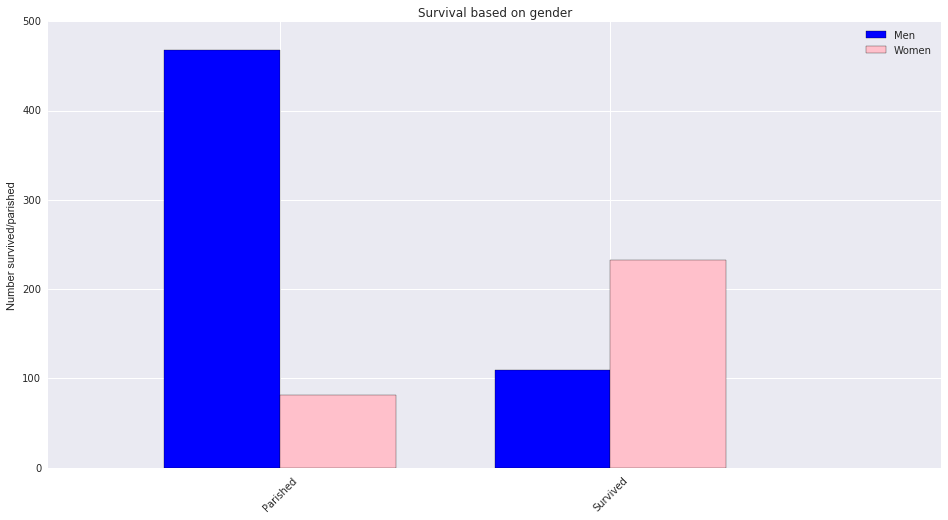

In [30]:
N = 2
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ind = np.arange(N)                
width = 0.35

rects1 = ax.bar(ind, M_data, width,
                color='blue')

rects2 = ax.bar(ind+width, F_data, width,
                    color='pink')

ax.set_xlim(-width,len(ind)+width)
ax.set_ylabel('Number survived/parished')
ax.set_title('Survival based on gender')
xTickMarks = ['Parished', 'Survived']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)
ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

plt.show()

In [22]:
df_dead_Cher = df_dead[df_dead['Embarked'] == 'C']
df_dead_SH = df_dead[df_dead['Embarked'] == 'S']
df_dead_QT = df_dead[df_dead['Embarked'] == 'Q']
df_alive_Cher = df_alive[df_alive['Embarked'] == 'C']
df_alive_SH = df_alive[df_alive['Embarked'] == 'S']
df_alive_QT = df_alive[df_alive['Embarked'] == 'Q']
Cher_data = [df_dead_Cher.shape[0], df_alive_Cher.shape[0]]
SH_data = [df_dead_SH.shape[0], df_alive_SH.shape[0]]
QT_data = [df_dead_QT.shape[0], df_alive_QT.shape[0]]

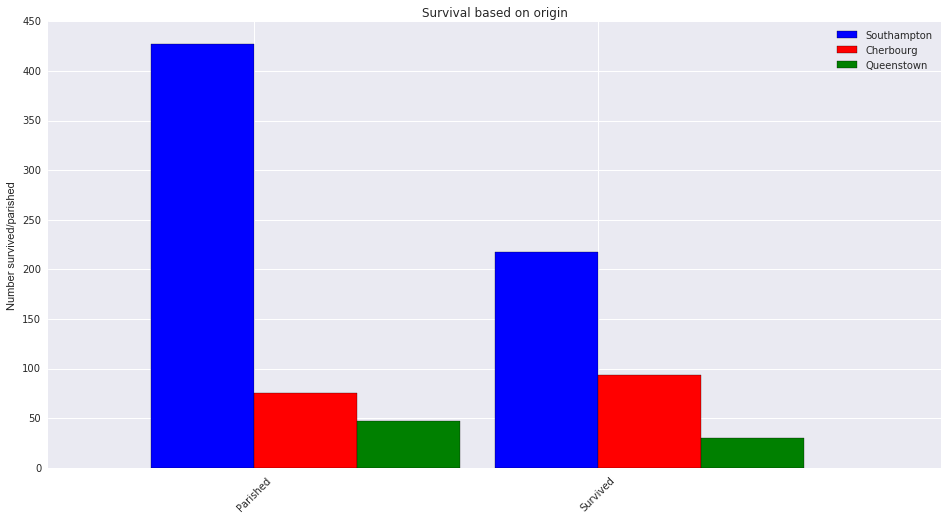

In [32]:
N = 2
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ind = np.arange(N)                
width = 0.30

rects1 = ax.bar(ind, SH_data, width,
                color='blue')

rects2 = ax.bar(ind+width, Cher_data, width,
                    color='red')

rects3 = ax.bar(ind+width+width, QT_data, width, color='green')

ax.set_xlim(-width,len(ind)+width)
ax.set_ylabel('Number survived/parished')
ax.set_title('Survival based on origin')
xTickMarks = ['Parished', 'Survived']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Southampton', 'Cherbourg', 'Queenstown') )

plt.show()

In [33]:
df_0_m_1 = df_dead[ (df_dead['Sex'] == 'male') & (df_dead['Pclass'] == 1)]
df_0_m_2 = df_dead[ (df_dead['Sex'] == 'male') & (df_dead['Pclass'] == 2)]
df_0_m_3 = df_dead[ (df_dead['Sex'] == 'male') & (df_dead['Pclass'] == 3)]
df_1_m_1 = df_alive[ (df_alive['Sex'] == 'male') & (df_alive['Pclass'] == 1)]
df_1_m_2 = df_alive[ (df_alive['Sex'] == 'male') & (df_alive['Pclass'] == 2)]
df_1_m_3 = df_alive[ (df_alive['Sex'] == 'male') & (df_alive['Pclass'] == 3)]

df_0_f_1 = df_dead[ (df_dead['Sex'] == 'female') & (df_dead['Pclass'] == 1)]
df_0_f_2 = df_dead[ (df_dead['Sex'] == 'female') & (df_dead['Pclass'] == 2)]
df_0_f_3 = df_dead[ (df_dead['Sex'] == 'female') & (df_dead['Pclass'] == 3)]
df_1_f_1 = df_alive[ (df_alive['Sex'] == 'female') & (df_alive['Pclass'] == 1)]
df_1_f_2 = df_alive[ (df_alive['Sex'] == 'female') & (df_alive['Pclass'] == 2)]
df_1_f_3 = df_alive[ (df_alive['Sex'] == 'female') & (df_alive['Pclass'] == 3)]

m_1_data = [df_0_m_1.shape[0], df_1_m_1.shape[0]]
m_2_data = [df_0_m_2.shape[0], df_1_m_2.shape[0]]
m_3_data = [df_0_m_3.shape[0], df_1_m_3.shape[0]]

f_1_data = [df_0_f_1.shape[0], df_1_f_1.shape[0]]
f_2_data = [df_0_f_2.shape[0], df_1_f_2.shape[0]]
f_3_data = [df_0_f_3.shape[0], df_1_f_3.shape[0]]

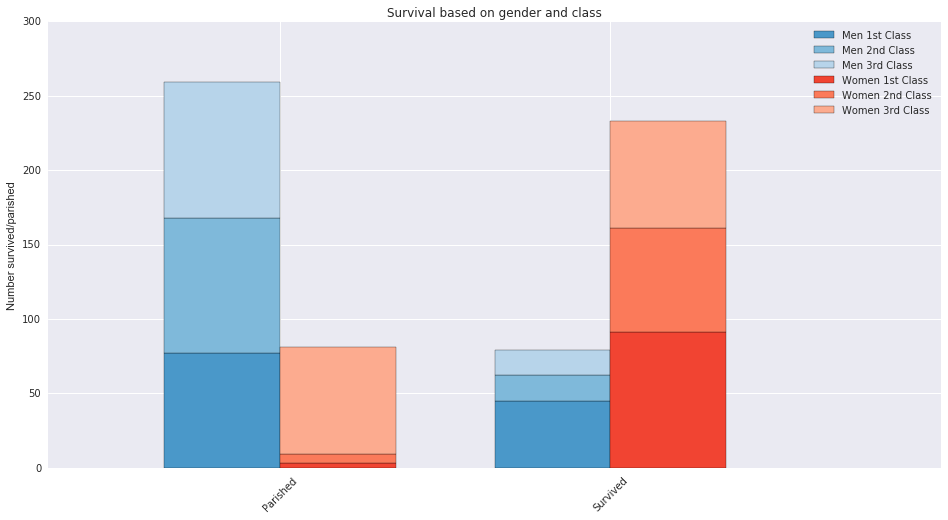

In [71]:
N = 2
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ind = np.arange(N)                
width = 0.35

colors = np.r_[np.linspace(0.3, 0.6, 3)]
mymap = plt.get_cmap("Blues")
mymap2 = plt.get_cmap("Reds")
malecolors = mymap(colors)
femalecolors = mymap2(colors)
  

men_1 = ax.bar(ind, m_1_data, width,
                color=malecolors[2])

men_2 = ax.bar(ind, m_2_data, width, bottom= m_1_data,
                    color=malecolors[1])

men_3 = ax.bar(ind, m_2_data, width, bottom=[i+j for i,j in zip(m_1_data, m_2_data)], color=malecolors[0])


women_1 = ax.bar(ind+width, f_1_data, width, color=femalecolors[2])

women_2 = ax.bar(ind+width, f_2_data, width, bottom=f_1_data, color=femalecolors[1])

women_3 = ax.bar(ind+width, f_3_data, width, bottom=[i+j for i, j in zip(f_1_data, f_2_data)], color=femalecolors[0])

ax.set_xlim(-width,len(ind)+width)
ax.set_ylabel('Number survived/parished')
ax.set_title('Survival based on gender and class')
xTickMarks = ['Parished', 'Survived']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)
ax.legend( (men_1[0], men_2[0], men_3[0], women_1[0], women_2[0], women_3[0] ),\
          ('Men 1st Class', 'Men 2nd Class','Men 3rd Class', 'Women 1st Class','Women 2nd Class','Women 3rd Class'))

plt.show()

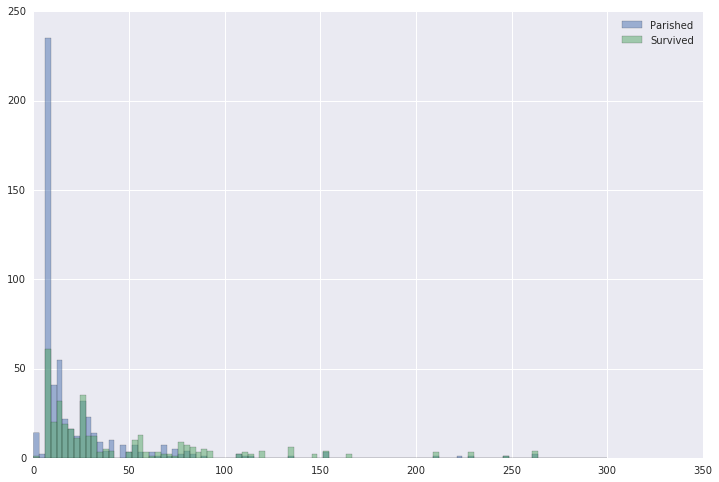

In [73]:
age_0 = df_dead['Fare']
age_1 = df_alive['Fare']

bins = np.linspace(0, 300, 100)
plt.figure(figsize=(12, 8), dpi=80)
plt.hist(age_0, bins, alpha=0.5, label='Parished')
plt.hist(age_1, bins, alpha=0.5, label='Survived')
plt.legend(loc='upper right')
plt.show()

Data cleaning for Modeling

In [31]:
df_model = df[['Survived','Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]

In [32]:
df_model['Sex'] = df_model['Sex'].map({'male': 1, 'female': 0})
df_model['Embarked'] = df_model['Embarked'].map({'S': 0, 'C': 1,'Q': 2})

/Users/claytonporter/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/claytonporter/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [43]:
class1_age = df_model[df_model['Pclass'] == 1].median().Age
class2_age = df_model[df_model['Pclass'] == 2].median().Age
class3_age = df_model[df_model['Pclass'] == 3].median().Age
print '1st Class median age: ', class1_age
print '2nd Class median age: ', class2_age
print '3rd Class median age: ', class3_age


1st Class median age:  37.0
2nd Class median age:  29.0
3rd Class median age:  24.0


In [36]:
df_model.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,0.0
1,1,1,0,38.0,71.2833,1.0
2,1,3,0,26.0,7.9250,0.0
3,1,1,0,35.0,53.1000,0.0
4,0,3,1,35.0,8.0500,0.0


In [44]:
df_1 = df_model[df_model['Pclass'] == 1]
df_2 = df_model[df_model['Pclass'] == 2]
df_3 = df_model[df_model['Pclass'] == 3]

In [52]:
df_1['Age'] = df_1['Age'].fillna(class1_age)
df_2['Age'] = df_2['Age'].fillna(class2_age)
df_3['Age'] = df_3['Age'].fillna(class3_age)

/Users/claytonporter/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/claytonporter/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/claytonporter/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [54]:
frames = [df_1, df_2, df_3]
df_model2 = pd.concat(frames)

In [58]:
df_model2['Embarked'] = df_model2['Embarked'].fillna(0)

In [59]:
df_model2.count()

Survived    891
Pclass      891
Sex         891
Age         891
Fare        891
Embarked    891
dtype: int64